In [1]:
import csv, numpy, glob
import matplotlib.pyplot as plt
import os

In [2]:
def get_data(fname):
    '''read data from csv file.
    '''
    with open(fname, newline='') as f:
        reader = csv.reader(f)
        data = []
        for row in reader:
            if "12A" in row[0]:
                data.append(list(map(float, row[1:5])))
    return numpy.array(data).T

In [3]:
def plot():
    # list of file names.
    # fnames = [
    #          #1
    #          "Applejack-12A-1-21-2023_Applejack-12A-1-21-2023.csv",
    #          #2
    #          "Battery1-12A_1_23_2023_Battery1-12A_1_23_2023.csv",
    #          #3
    #          "Battery2-12A-1-21-2023_Battery2-12A-1-21-2023.csv",
    #          #4
    #          "BatteryC-12A-10-18-2023_Test_1.csv",
    #          "BatteryD-12A-1-25-2023_BatteryD-12A-1-25-2023.csv",
    #          "CDia-12A-1-25-2023_CDia-12A-1-25-2023.csv",
    #          "Camembert-12A-1-21-2023_Camembert-12A-1-21-2023.csv",
    #          "Earth-12A-3-18-2023_Earth.csv",
    #          "Feta-12A-3-17-2023.csv",
    #          "Fluttershy-12A-1-25-2023_Fluttershy-12A-1-25-2023.csv",
    #          "Jupiter-12A-3-14-2023.csv",
    #          "Mars-12A-3-21-2023_Mars.csv",
    #          "Mercury-12A-2-7-2023_Mercury-12A-2-7-2023.csv",
    #          "PinkePie-12A-3-39-2023.csv",
    #          "RainbowDash-12A-1-24-2023_RainbowDash-12A-1-24-2023.csv",
    #          "Saturn-12A-3-14-2023.csv",
    #          "Swiss-12A-1-21-2023_Swiss-12A-1-21-2023.csv",
    #          "Venus-12A-3-15-2023_Venus.csv",
    #          ]
    # Automatic retrieve file names in data folder
    fnames =glob.glob("./data/*csv")
  
    # get data from the list of files.
    data = [get_data(s) for s in fnames]

    # a 3x1 plot
    fig, axs = plt.subplots(2, 1,
            tight_layout=True,
            sharex=True,
            figsize=(4, 5.5),
            height_ratios=[4, 1]
            )
    
    labels = [s[len("./data/"):].split("-")[0] for s in fnames]
    # color = ['#6bfa43', '#fa9a25', '#face2f', '#25f6fa', '#0f84fa', '#e9f542', '#42f5bf', '#fc1921', '#99ebf0', '#837896', '#f547cc', '#bf2cf5', '#b596a4', '#fc038c', '#e9f542', '#277a2d', '#1c5922', '#bcfc26', '#fcba03']
    # choose default colors.
    for j in range(2):
        for i, fname in enumerate(fnames):
            # axs[j].plot(data[i][0,:], data[i][j+1,:], color = color[i], label=labels[i])
            axs[j].plot(data[i][0,:], data[i][j+1,:], label=labels[i])

    axs[0].grid()
    axs[0].set_ylabel("Voltage (V)")
    axs[1].set_ylabel("Current (A)")
    axs[1].set_xlabel("Time (s)")
    axs[0].legend(fontsize = 8)
    plt.show()
    fig.savefig('batteryVI.pdf')

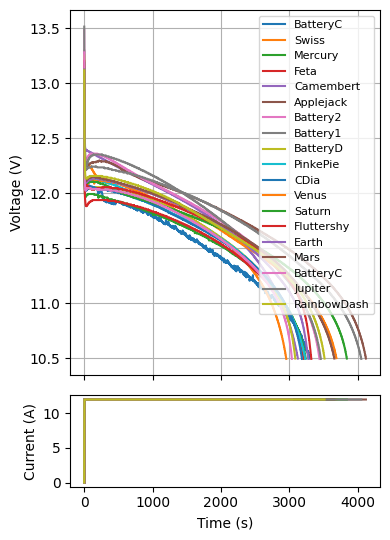

In [4]:
if __name__ == "__main__":
    plot()